# Getting the necessary data

You just need to do this only once

In [1]:
!rm -f NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam 2>/dev/null
!rm -f NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam.bai

--2015-12-26 23:06:03--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/exome_alignment/NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam
           => ‘NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
접속 ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... 접속됨.
Logging in as anonymous ... 로그인 완료!
==> SYST ... done.    ==> PWD ... 마침.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/exome_alignment ... 마침.
==> SIZE NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... 327067172
==> PASV ... done.    ==> RETR NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam ... 마침.
길이 : 327067172 (312M) (unauthoritative)

100%[======================================>] 327,067,172  706KB/s   in 8m 4s  

2015-12-26 23:14:12 (661 KB/s) - ‘NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam’ saved [327067172]

--2015-12-26 23:14:12--  ftp://ftp.1000genomes.ebi.ac.uk/vol

# The recipe

In [2]:
from collections import defaultdict

import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pysam

#### 1.Let's inspect the header files:

In [3]:
bam = pysam.AlignmentFile('NA18489.chrom20.ILLUMINA.bwa.YRI.exome.20121211.bam', 'rb')

In [4]:
headers = bam.header #header as a dictionary
for record_type, records in headers.items():
    print (record_type)
    for i, record in enumerate(records):
        print('\t%d' % (i + 1))
        for field, value in record.items():
            print('\t\t%s\t%s' % (field, value))

SQ
	1
		LN	249250621
		M5	1b22b98cdeb4a9304cb5d48026a85128
		SN	1
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	2
		LN	243199373
		M5	a0d9851da00400dec1098a9255ac712e
		SN	2
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	3
		LN	198022430
		M5	fdfd811849cc2fadebc929bb925902e5
		SN	3
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	4
		LN	191154276
		M5	23dccd106897542ad87d2765d28a19a1
		SN	4
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequence/hs37d5.fa.gz        AS:NCBI37       SP:Human
	5
		LN	180915260
		M5	0740173db9ffd264d728f32784845cd7
		SN	5
		UR	ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/phase2_reference_assembly_sequen

AttributeError: 'str' object has no attribute 'items'

#### 2.We will now inspect a single record. The amount of data per record is quite complex.
Here, we will focus on some of the fundamental fields for paired-end reads. Check the SAM file specification and the Pysam API documentation for more details:

In [5]:
#pysam: 0-based
for rec in bam: #transverse until we find a record whose CIGAR string contains a match and a soft clip.
    if rec.cigarstring.find('M') > -1 and rec.cigarstring.find('S') > -1 and not rec.is_unmapped and not rec.mate_is_unmapped:
        break
print(rec.query_name, rec.reference_id, bam.getrname(rec.reference_id), rec.reference_start, rec.reference_end)
print(rec.cigarstring)
print(rec.query_alignment_start, rec.query_alignment_end, rec.query_alignment_length)
print(rec.next_reference_id, rec.next_reference_start, rec.template_length)
print(rec.is_paired, rec.is_proper_pair, rec.is_unmapped, rec.mapping_quality)
print(rec.query_qualities)
print(rec.query_alignment_qualities)
print(rec.query_sequence)

('SRR100025.62130839', 19, '20', 59996, 60048)
52M24S
(0, 52, 52)
(19, 60228, 295)
(True, True, False, 60)
array('B', [33, 34, 36, 33, 39, 34, 33, 38, 39, 34, 40, 35, 40, 40, 32, 40, 38, 33, 35, 38, 33, 39, 40, 34, 37, 39, 36, 30, 36, 37, 34, 35, 34, 40, 37, 34, 38, 28, 40, 40, 38, 32, 33, 32, 36, 34, 37, 24, 34, 35, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
array('B', [33, 34, 36, 33, 39, 34, 33, 38, 39, 34, 40, 35, 40, 40, 32, 40, 38, 33, 35, 38, 33, 39, 40, 34, 37, 39, 36, 30, 36, 37, 34, 35, 34, 40, 37, 34, 38, 28, 40, 40, 38, 32, 33, 32, 36, 34, 37, 24, 34, 35, 31, 2])
CTCAGATCCAGAGGTGGAAGAGGAAGGAAGCTTGGAACCCTATAGAGTTGCTGAGTGCCAGGACCAGATACTGGGC


#### 3.Let's now plot the distribution of successfully mapped positions in a subset of sequences in the BAM file:

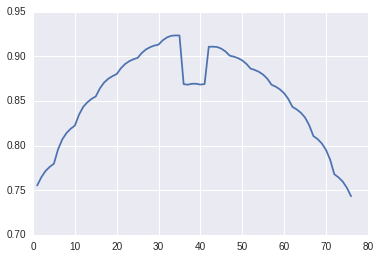

In [6]:
counts = [0] * 76
for n, rec in enumerate(bam.fetch('20', 0, 10000000)):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        counts[i] += 1
freqs = [x / (n + 1.) for x in counts]
plt.plot(range(1, 77), freqs)

#### 4.Let's get the distribution of Phred scores across the mapped part of the reads.
As you may suspect, this is probably not going to be uniform:

In [ ]:
phreds = defaultdict(list)
for rec in bam.fetch('20', 0, None):
    for i in range(rec.query_alignment_start, rec.query_alignment_end):
        phreds[i].append(rec.query_qualities[i])

In [ ]:
maxs = [max(phreds[i]) for i in range(76)]
tops = [np.percentile(phreds[i], 95) for i in range(76)]
medians = [np.percentile(phreds[i], 50) for i in range(76)]
bottoms = [np.percentile(phreds[i], 5) for i in range(76)]
medians_fig = [x - y for x, y in zip(medians, bottoms)]
tops_fig = [x - y for x, y in zip(tops, medians)]
maxs_fig = [x - y for x, y in zip(maxs, tops)]

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.stackplot(range(1, 77), (bottoms, medians_fig, tops_fig, maxs_fig))
ax.plot(range(1, 77), maxs, 'k-')

<img src="fig2-4.png">

### See also
- SAM/BAM format : http://samtools.github.io/hts-specs/SAMv1.pdf
- Introductory explanation to the SAM format : http://genome.sph.umich.edu/wiki/SAM
- Complex statistics from BAM files : https://github.com/alimanfoo/pysamstats
- Burrows-Wheeler Aligner (BWA) : the most widely used aligner, http://bio-bwa.sourceforge.net/
- Picard (surely a Star Trek – the next-generation reference) : the most commonly used tool to clean up BAM files; http://broadinstitute.github.io/picard/
- SEQanswers: the technical forum for sequence analysis; http://seqanswers.com/
- biostars : http://www.biostars.org/
- For the complete genomics data, take a look at their data results FAQ at http://www.completegenomics.com/customer-support/faqs/